# Техническое Задание "Анализ интернет-магазина"

Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 2. Анализ A/B-теста

По результатам A/B-теста получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализировать A/B-тест с использованием кмумлятивного накопления данных и расчета статистической значимости:
1.	Построить график кумулятивной выручки по группам.
2.	Построить график кумулятивного среднего чека по группам.
3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
4.	Построить график кумулятивного среднего количества заказов на посетителя по группам.
5.	Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
6.	Построить точечный график количества заказов по пользователям. 
7.	Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8.	Построить точечный график стоимостей заказов.
9.	Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
14. Выводы.




Импортируем библиотеки

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime as dt
import plotly.express as px
from plotly import graph_objects as go

from scipy import stats as st
import math as mth

### Приоритизация гипотез

Скачиваем датасеты

Файл /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотез

In [2]:
df = pd.read_csv('//datasets/hypothesis.csv')
df.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# прочитаем гипотезы
n = 0
for hypo in df['Hypothesis']:
    print(f'№ {n}', hypo)
    n += 1

№ 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
№ 1 Запустить собственную службу доставки, что сократит срок доставки заказов
№ 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
№ 3 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
№ 4 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
№ 5 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
№ 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
№ 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
№ 8 Запустить акцию, дающую скидку на товар в день рождения


Итого 9 гипотез.

**Задача**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


In [4]:
df['ICE'] = round((df['Impact'] * df['Confidence'])/df['Efforts'], 2)
pd.options.display.max_colwidth = 100

In [5]:
df[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Комментарии:

- 1-е место гипотеза № 8: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2-е место гипотеза № 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 3-е место гипотеза № 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Задача**

- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [6]:
df['RICE'] = (df['Reach'] * df['Impact'] * df['Confidence'])/df['Efforts']

In [7]:
df[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Комментарии:

- 1-е место гипотеза № 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2-е место гипотеза № 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 3-е место гипотеза № 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

8-я гипготеза опустилась на 5-е место. 

**Выводы:**

- Приоритизация гипотез при применении RICE вместо ICE поменялась за счет параметра reach(скольких пользователей затронет изменение) - у 7-й гипотезы он самый высокий 10 при относительно низких efforts(5). 0-я гипотеза осталась в тройке за счет высоких показателей impact и confidence при относительно низких efforts (6).


### Анализ A/B-теста

**Задача**

Проанализировать A/B-тест по результатам, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv:

1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


In [8]:
# файл df_orders
orders = pd.read_csv('/datasets/orders.csv')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# переведём дату в временной формат
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# проверка на дуликаты
print('Кол-во дубликатов в orders:', orders.duplicated().sum())

Кол-во дубликатов в orders: 0


In [12]:
# проверка на пересечение по клиентам в группах
double_visitors = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()
print('Количество пересекающихся клиентов:', double_visitors)
print(len(double_visitors))

Количество пересекающихся клиентов: group    58
dtype: int64
1


In [13]:
# список клиентов с уникальным номером Id
double_visitors = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()

# удалим пересекающихся клиентов в группах
orders = orders.query('visitorId not in @double_visitors')

In [14]:
# файл df_visitors
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
# переведём дату в временной формат
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
# проверка на дубликаты
print('Кол-во дубликатов в visitors:', visitors.duplicated().sum())

Кол-во дубликатов в visitors: 0


In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [19]:
# агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg(
        {'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}
    ), axis=1
).sort_values(by=['date','group'])

In [20]:
# агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
    ), axis=1
).sort_values(by=['date','group'])

In [21]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Построим график кумулятивной выручки по группам.

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

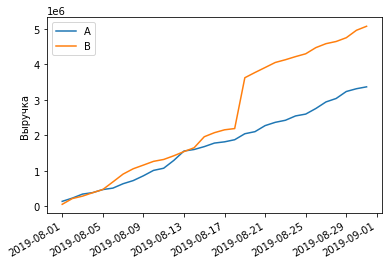

In [24]:
# Строим графики выручки групп А и B
# plt.figure(figsize=(15, 7))
fig = plt.figure()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
fig.autofmt_xdate()
plt.ylabel('Выручка')
plt.legend()

Комментарии:

- с 2019-08-17 выручка группы 'B' ушла в отрыв, возможно, был рост заказов или были включены аномально дорогие заказы в выборку

Построим графики среднего чека по группам

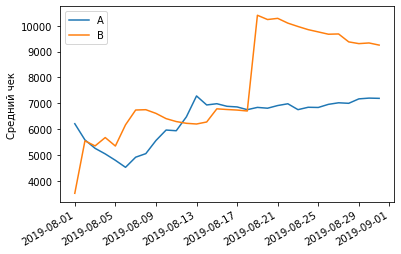

In [25]:
# разделим кумулятивную выручку на кумулятивное число заказов
fig = plt.figure()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Средний чек')
fig.autofmt_xdate()
plt.legend() 

Комментарии:

- Результаты похожи на предыдущий график. Возможно, после 17.08.19 попали крупные заказы(резкий всплеск на графике).

Построим график относительного различия для среднего чека.

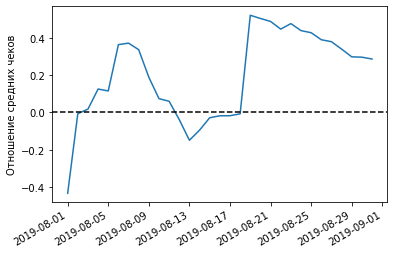

In [26]:
# Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»).
fig = plt.figure()
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# добавляем ось X
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.ylabel('Отношение средних чеков')
fig.autofmt_xdate()


Комментарии:

- В нескольких точках график различия между сегментами резко «скачет». Очевидно, что в выборке присутствуют выбросы.

Построим график кумулятивного среднего количества заказов на посетителя по группам

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группам А и B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

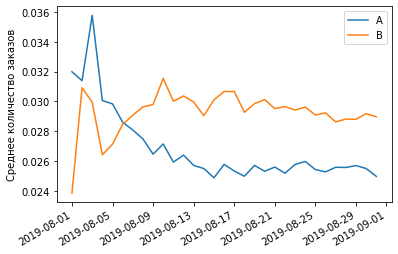

In [28]:
# строим графики
# plt.figure(figsize=(12, 6))
fig = plt.figure()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Среднее количество заказов')
plt.legend()
fig.autofmt_xdate()

Комментарии:

Группы начинали в одном тренде и группа B отставала, но затем конверсия группы B стала расти и зафиксировалась, конверсия группы A активно снижалась и зафиксировалсь.

Построим график относительного различия кумулятивных конверсий

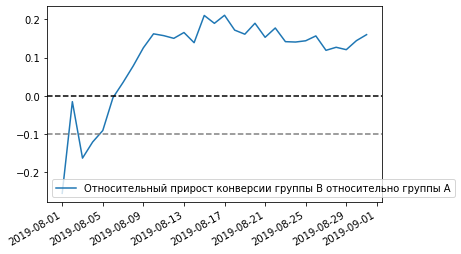

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
fig = plt.figure()
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
    label='Относительный прирост конверсии группы B относительно группы A'
)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
# plt.axis(['2019-08-01', '2019-09-01', -0.6, 0.6]) выдает непонятную ошибку ConversionError: Failed to convert value(s) to axis units: '2019-08-01'
fig.autofmt_xdate()

Комментарии:
    
Относительный прирост конверсии начал активно расти после 5/08, достиг пиковых значений в середине месяца и к концу месяца снизился и стабилизировался

Построим точечный график количества заказов по пользователям. 

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


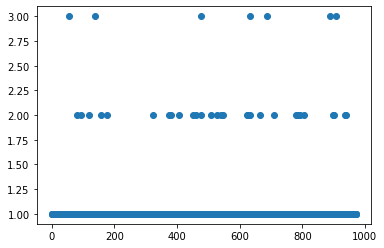

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Для наглядности построим гистограмму распределения заказов на одного пользователя

Text(0.5, 0, 'Заказы')

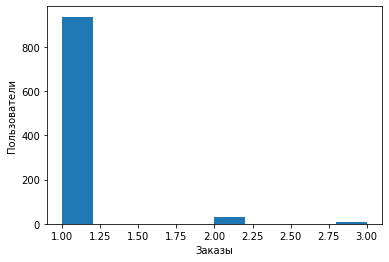

In [32]:
plt.hist(ordersByUsers['orders'])
plt.ylabel('Пользователи')
plt.xlabel('Заказы')

Комментарии:

Большинство покупателей заказывали только один раз. Есть пользователи, которые совершали 5-11 заказов, что значительно больше обычного пользователя за период, но их доля незначительна. Много пользователей с 2-3 заказами. Непонятно, считать эти зказы аномальными или нет - посчитаем выборочные перцентили на пользователя.

In [33]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Разумно выбрать 2-3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Построим точечный график стоимостей заказов.

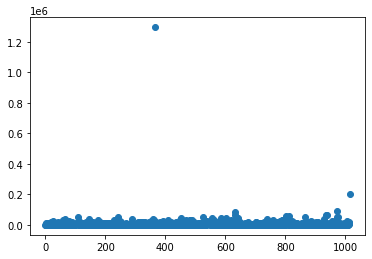

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Text(0.5, 0, 'Стоимости')

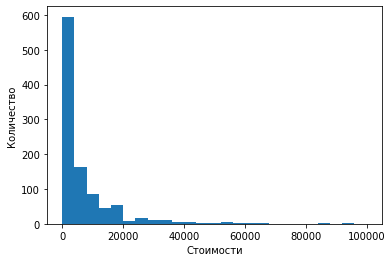

In [35]:
# изучим гистограмму распределения стоимостей заказов
plt.hist(orders['revenue'], bins = 25, range = (0, 100000))
plt.ylabel('Количество')
plt.xlabel('Стоимости')

Есть скачки по стоимости до 200,000, и выше 1,200,000. Основная масса заказов по стоимости 1-2,000, но есть заказы дороже 40 000, например около 60 000, 80 000 и 90 000

In [36]:
# определим перцентили
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


Целесообразно выбрать 28000 за верхнюю границу стоимости заказов

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:
- h0: различий в среднем количестве заказов между группами нет.
- h1: различия в среднем между группами есть.

In [37]:
# датафрейм с посетителями по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
# переименуем стоблцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [38]:
# кумулятивные данные по дням о количестве пользователей в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
# переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [39]:
# сформируем аналогичный датафрейм и кмулятивные данные по дням по группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [40]:
# соберем данные о количестве заказов, суммарной выручке по дням в группе А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [41]:
#  куммулятивные количество заказов, суммарная выручка по дням в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date' : 'max','ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}
    ), axis=1
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [42]:
# cоберем данные о количестве заказов, суммарной выручке по дням в группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [43]:
#  куммулятивные количество заказов, суммарная выручка по дням в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ), axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB',]

In [44]:
# обьединим полученные данные в один датафреейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head()) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


- Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Применим ___статистический критерий Манна-Уитни___ к полученным выборкам
- Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].
- В них для пользователей, которые - заказывали хотя бы 1 раз, укажем число совершённых заказов.
- Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [45]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [46]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
    ],axis=0
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')
    ],axis=0
) 

- Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
- Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой

In [47]:
print('alpha =', 0.05)
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value: 0.011
Относительный прирост конверсии группы B: 0.160


# Комментарии

- p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу - отвергаем, можно сказать, что в конверсии между группами есть статистически значимые различия.
- Относительный прирост конверсии группы B равен 16%

Проверим статистическую значимость различий в среднем чеке между сегментами. 
- h0: различий в среднем чеке между группами нет
- h1: различия в среднем чеке между группами есть.

In [48]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель "B" и "A": {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный показатель "B" и "A": 0.287


# Комментарии

P-value 0.829 больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
В то же время относительный прирост коэффициента конверсии группы В составил 28.7%, что требует дальнейшегно анализа.

**С учетом того что предыдущий анализ показал аномальные данные, необходимо посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**



In [49]:
# cделаем срезы пользователей с числом заказов больше 3  и пользователей, совершивших заказы дороже 28 000
NUMBER_OF_ORDERS = 3
VALUE_OF_ORDERS = 28000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > NUMBER_OF_ORDERS]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > NUMBER_OF_ORDERS]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > VALUE_OF_ORDERS]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
dtype: int64
48


Всего, с учетом выставленных критериев, выявлено 48 аномальных пользователей.

Подготовим выборки количества заказов по пользователям по группам теста.

Гипотезы: 

- h0: Статистически значимых различий в конверсии между группами нет
- h1: Cтатистически значимые различия есть.

In [50]:
# по группе А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [51]:
# по группе В
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [52]:
print('alpha =', 0.05)
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель "B" и "A": {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value: 0.013
Относительный показатель "B" и "A": 0.162


# Результат похож на расчет с сырыми данными:
- нулевую гипотезу отвергаем.
- относительный прирост коэффициента конверсии группы В 16.2%.

Проверим результаты по среднему чеку:

Гипотезы:
- h0: статистически значимых различий в средних чеках между группами нет
- h1: статистически значимые различия есть.

In [53]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный показатель "B" и "A": {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.862
Относительный показатель "B" и "A": -0.028


P-value увеличился, относительный прирост конверсии группы В сократился с 16.2% до 2.8%, очевидно влияние аномальных средних чеков на сырые данные.

# Выводы:

На основе проведенного анализа A/B тестов считаю, что тест возможно остановить и признать его результаты достаточными чтобы сделать вывод: результаты группы А хуже группы В и нет значительной тенденции к улучшению.

Группы начинали в одном тренде и группа B отставала, но затем конверсия группы B стала расти и зафиксировалась примерно на одном уровне, конверсия группы A активно снижалась и зафиксировалсь примерно на одном уровне.

Относительный прирост конверсии группы В относительно группы А начал активно расти после 5/08, достиг пиковых значений в середине месяца и к концу месяца снизился и стабилизировался